# 2D Gaussian Mixture Model

This notebook demonstrates how to use Gaussian Mixture Models to cluster 2D data distribution.

## Import Required Libraries

Import the necessary libraries including matplotlib, numpy, pandas, seaborn, and scikit-learn.

In [1]:
# Import the required libraries.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.mixture import GaussianMixture

## Define Colors and Generate Sample Data

Define custom colors for visualizations and generate anisotropically distributed blob data.

In [2]:
# Define the colors to be used in the plot.
colors = [
    "#2580B7", # Blue
    "#179E86", # Dark Green
    "#9EBE5B", # Light Green
    "#F59B11", # Yellow
    "#C03B26", # Red
    "#633248", # Brown
    "#44546A", # Gray
]

# Anisotropicly distributed data.
N_SAMPLES = 500
RANDOM_STATE = 170
X, _ = datasets.make_blobs(n_samples=N_SAMPLES, random_state=RANDOM_STATE)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X = np.dot(X, transformation)

# Creating a DataFrame for the dataset.
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])

## Apply Gaussian Mixture Model

Apply GMM clustering with 3 components to the anisotropic data.

In [3]:
# Applying Gaussian Mixture Model.
gmm = GaussianMixture(n_components=3, random_state=RANDOM_STATE)
df["GMM_Cluster"] = gmm.fit_predict(X)

## Visualize GMM Clustering Results

Plot the Gaussian Mixture Model clustering results.

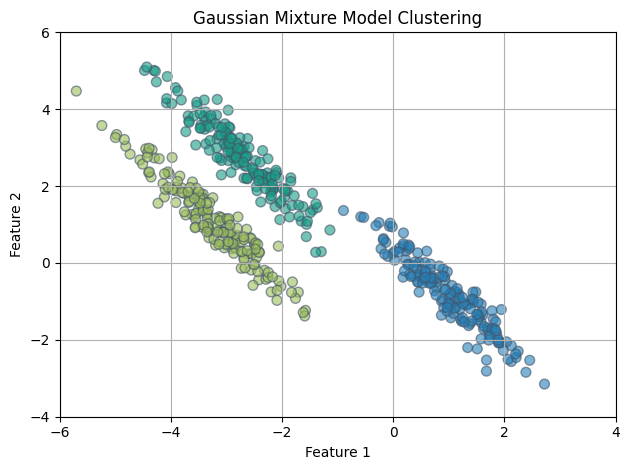

In [4]:
# Plotting the Gaussian Mixture Model clusters.
plt.scatter(
    df["Feature 1"], df["Feature 2"],
    c=[colors[color] for color in df["GMM_Cluster"]],
    s=50, edgecolor=colors[-1], alpha=0.6
)
plt.title("Gaussian Mixture Model Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.xlim(-6, 4)
plt.ylim(-4, 6)
plt.grid(True)
plt.tight_layout()
plt.show()

## Visualize KDE Distribution

Plot the kernel density estimation distribution with cluster assignments.

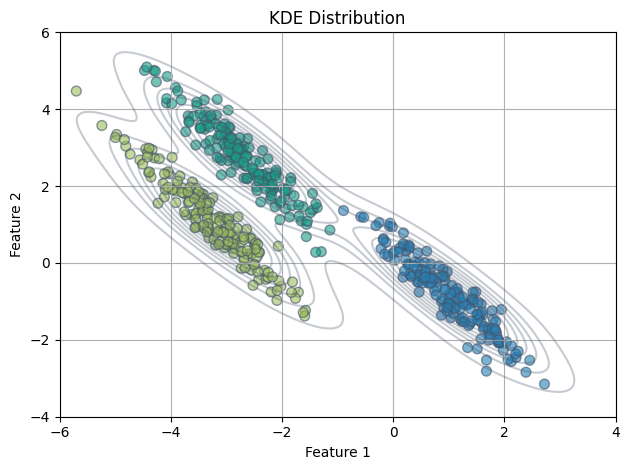

In [5]:
# Plotting the KDE distribution for the features.
sns.kdeplot(
    x=df["Feature 1"], y=df["Feature 2"],
    color=colors[-1], alpha=0.3
)
plt.scatter(
    df["Feature 1"], df["Feature 2"],
    c=[colors[color] for color in df["GMM_Cluster"]],
    s=50, edgecolor=colors[-1], alpha=0.6
)
plt.title("KDE Distribution")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.xlim(-6, 4)
plt.ylim(-4, 6)
plt.grid(True)
plt.tight_layout()
plt.show()